In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm_notebook as tqm
import tensorflow as tf

from subbatch import Subbatch
from dataset import Dataset, Batch, model, DatasetIndex, action

%matplotlib inline

In [5]:
BATCHSIZE = 100
MNISTSIZE = 1000

ix = DatasetIndex(range(MNISTSIZE))
dset = Dataset(ix, Subbatch)

In [ ]:
iter_time = []
acc = []
times = []
grid = np.arange(1,101)[(100 % np.arange(1,101)) == 0]
for NUM_SUBBATCHES in grid:
    tf.reset_default_graph()
    sess = tf.Session()
    ppl = (dset.p
           .init_variable("NUM_SUBBATCHES", NUM_SUBBATCHES)
           .init_variable("session", sess)
           .load()
           .train(sess,iter_time,acc)) #заснуть время сюда

    for i in tqm(range(100)):
        ppl.next_batch(batch_size=BATCHSIZE, shuffle=True, n_epochs=10)
    times.append(np.mean(iter_time[1:]))

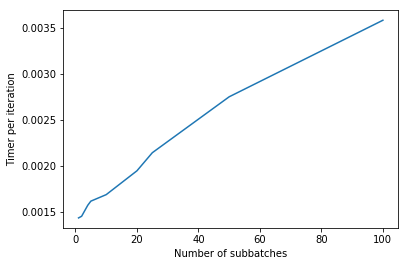

In [6]:
plt.plot(grid, times)
plt.xlabel('Number of subbatches')
plt.ylabel('Timer per iteration')
plt.show()